In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
folder_path = '/content/drive/My Drive/United Airlines'

In [ ]:
f1 = os.path.join(folder_path, 'callsf0d4f5a.csv')
f2 = os.path.join(folder_path, 'customers2afd6ea.csv')
f3 = os.path.join(folder_path, 'reason18315ff.csv')
f4 = os.path.join(folder_path, 'sentiment_statisticscc1e57a.csv')
f5 = os.path.join(folder_path, 'testbc7185d.csv')
try:
  call_df = pd.read_csv(f1)
  customer_df = pd.read_csv(f2)
  reason_df = pd.read_csv(f3)
  sentiment_df = pd.read_csv(f4)
  test_df = pd.read_csv(f5)
except FileNotFoundError:
  print(f"File not found")


#Cleaning Primary_call_Reasons by NLP techniques

In [ ]:
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('[^\w\s]', ' ', regex=True)

In [ ]:
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.strip()

In [ ]:

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('\s+', ' ', regex=True)

In [ ]:
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.lower()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords_and_conjunctions(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].apply(remove_stopwords_and_conjunctions)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Convert datetime columns to pandas datetime
call_df['call_start_datetime'] = pd.to_datetime(call_df['call_start_datetime'])
call_df['agent_assigned_datetime'] = pd.to_datetime(call_df['agent_assigned_datetime'])
call_df['call_end_datetime'] = pd.to_datetime(call_df['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
call_df['AHT'] = (call_df['call_end_datetime'] - call_df['call_start_datetime']).dt.total_seconds()
call_df['AST'] = (call_df['agent_assigned_datetime'] - call_df['call_start_datetime']).dt.total_seconds()

# Preview the newly added columns
print(call_df[['call_id', 'AHT', 'AST']].head())


      call_id     AHT    AST
0  4667960400  2280.0  420.0
1  1122072124   900.0  180.0
2  6834291559  1620.0  480.0
3  2266439882   720.0  300.0
4  1211603231  1140.0  600.0


In [ ]:
# Merging all dataframes
merged_df = call_df.merge(sentiment_df, on=['call_id', 'agent_id'], how='left')\
                   .merge(reason_df, on='call_id', how='left')\
                   .merge(customer_df, on='customer_id', how='left')

# Preview merged data
print(merged_df.head())


      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  \
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0   
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0   
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0   
3  \n\nAgent: Thank you for calling United Airlin...   720.0

#Cleaning transcripts by appying NLP techniques

In [ ]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = word_tokenize(text)  # Tokenize words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply the cleaning function to the 'call_transcript' column
call_df['cleaned_transcript'] = call_df['call_transcript'].apply(clean_text)

# Display the cleaned transcripts
print(call_df[['call_transcript', 'cleaned_transcript']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                         call_transcript  \
0      \n\nAgent: Thank you for calling United Airlin...   
1      \n\nAgent: Thank you for calling United Airlin...   
2      \n\nAgent: Thank you for calling United Airlin...   
3      \n\nAgent: Thank you for calling United Airlin...   
4      \n\nAgent: Thank you for calling United Airlin...   
...                                                  ...   
71805  \n\nAgent: Thank you for calling United Airlin...   
71806  \n\nAgent: Thank you for calling United Airlin...   
71807  \n\nAgent: Thank you for calling United Airlin...   
71808  \n\nAgent: Thank you for calling United Airlin...   
71809  \n\nAgent: Thank you for calling United Airlin...   

                                      cleaned_transcript  
0      agent thank calling united airlines customer s...  
1      agent thank calling united airlines name sam h...  
2      agent thank calling united airlines customer s...  
3      agent thank calling united airlines 

#Approach 1 Tried using Visual Language Model Qwen-Vl-utils

In [ ]:
pip install qwen-vl-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 43.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
)



# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "agent thank calling united airlines customer service name sarah may help customer hi yeah im calling flight chicago new york delayed hours ridiculous im missing important meetings agent im sorry hear delay thats definitely frustrating umm let pull reservation take look happened typing sounds okay looks like severe weather chicago caused multiple flight cancellations delays across board airlines ahh shoot yeah original flight scheduled depart pm didnt actually take pm customer ugh poor planning uniteds part rerouted passengers put us flights werent delayed ive wasted whole day agent understand frustration sir delays never fun let see options available help make hmm looks like get booked flight leaving pm tomorrow landing new york pm ill waive change fee provide travel voucher help cover expenses missed meetings today work schedule customer guess thats better nothing really need get act together unacceptable customer service united delays costing people time money agent youre right want better customers apologize delay inconvenience thank flying us hope rescheduled flight travel credit help make trouble today please feel free reach back issues thanks patience understanding appreciate taking time work customer alright fine better happen next time fly united agent ill sure note record try avoid repeats going forward take care good rest day customer yeah hangs agent thank call next caller please pretends answer another call hi thank calling united help",
            },
            {"type": "text", "text": "Give the primary reason for this conversation"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


#Approach 2

##Extract features from cleaned transcript using TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Limit to 1000 features

merged_df = call_df.merge(reason_df, on='call_id', how='inner')
# Fit and transform the cleaned transcripts
X = tfidf.fit_transform(merged_df['cleaned_transcript']).toarray()

# Extract the primary call reasons as labels
y = merged_df['primary_call_reason']

# Display the shape of the feature matrix
print("Feature matrix shape:", X.shape)


Feature matrix shape: (66653, 1000)


In [ ]:


merged_df.to_csv('/content/drive/My Drive/United Airlines/merged_data.csv', index=False)


In [ ]:
print(X)

[[0.         0.         0.         ... 0.02784101 0.         0.        ]
 [0.         0.         0.         ... 0.02088704 0.         0.        ]
 [0.         0.         0.         ... 0.04532499 0.03984121 0.        ]
 ...
 [0.         0.         0.         ... 0.03866531 0.         0.        ]
 [0.07621469 0.         0.         ... 0.08283079 0.05460694 0.        ]
 [0.0338669  0.         0.         ... 0.03680684 0.         0.        ]]


In [ ]:
filtered_df = merged_df[merged_df['average_sentiment'].notnull()]  # Filter out rows with NaN using pandas notnull
print("DataFrame without NaN values in 'average_sentiment':")
print(filtered_df)
filtered_df = filtered_df[merged_df['average_sentiment'].notnull()]
filtered_df = filtered_df[merged_df['average_sentiment'].notnull()]

DataFrame without NaN values in 'average_sentiment':
          call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118 2024-07-31 23:56:00   
1      1122072124   8186702651    519057 2024-08-01 00:03:00   
2      6834291559   2416856629    158319 2024-07-31 23:59:00   
3      2266439882   1154544516    488324 2024-08-01 00:05:00   
4      1211603231   5214456437    721730 2024-08-01 00:04:00   
...           ...          ...       ...                 ...   
71805  1563273072   8022667294    413148 2024-08-31 23:48:00   
71806  8865997781   4474867021    980156 2024-08-31 23:55:00   
71807  8019240181   9762042472    616988 2024-08-31 23:52:00   
71808  8332067080   8095620266    161354 2024-08-31 23:53:00   
71809  8210720833   8014388758    547592 2024-08-31 23:49:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-0

In [ ]:
columns_to_check = ['average_sentiment', 'AHT', 'silence_percent_average', 'primary_call_reason']
merged_df = merged_df.dropna(subset=columns_to_check)

##Applying Machine learning Models

###Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = merged_df[['AHT','average_sentiment','silence_percent_average']]
y = merged_df['primary_call_reason']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.2067463000525881
Classification Report:
                     precision    recall  f1-score   support

            baggage       0.00      0.00      0.00       562
            booking       0.00      0.00      0.00       514
              check       0.00      0.00      0.00       345
           checkout       0.10      0.01      0.02       351
     communications       0.00      0.00      0.00       771
    digital support       0.00      0.00      0.00       262
         disability       0.00      0.00      0.00        85
                etc       0.00      0.00      0.00       190
             irrops       0.21      0.87      0.34      2623
       mileage plus       0.00      0.00      0.00      1177
        post flight       0.18      0.03      0.05       875
  products services       0.00      0.00      0.00       662
    schedule change       0.00      0.00      0.00       139
            seating       0.00      0.00      0.00      1294
             topics       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

transcript = "Customer: Hi, I'm calling to report a problem with my internet connection..."
candidate_labels = ["Technical Support", "Billing Inquiry", "Account Management"]

result = classifier(transcript, candidate_labels)
print(result)

###Xgboost classifier

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Fit and transform the labels to numerical representations
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_))
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(X_test)

# Transform predictions back to original labels (optional)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.1900082514440027
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.01      0.01       604
           1       0.09      0.01      0.02       513
           2       0.00      0.00      0.00       359
           3       0.00      0.00      0.00       384
           4       0.06      0.01      0.02       757
           5       0.00      0.00      0.00       255
           6       0.00      0.00      0.00        86
           7       0.00      0.00      0.00       197
           8       0.23      0.61      0.33      2763
           9       0.13      0.06      0.09      1130
          10       0.15      0.06      0.08       848
          11       0.11      0.03      0.05       658
          12       0.00      0.00      0.00       146
          13       0.11      0.06      0.07      1235
          14       0.00      0.00      0.00       174
          15       0.00      0.00      0.00       190
          16       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd # Import pandas for handling DataFrames

# Assuming y_train and y_test are pandas Series
# If not, convert them to Series: y_train = pd.Series(y_train) etc.

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit and transform on training data
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform test data
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Get feature names for encoded columns
feature_names = encoder.get_feature_names_out(['primary_call_reason'])

# Convert encoded data to DataFrames with appropriate column names
y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=feature_names, index=y_train.index)
y_test_encoded_df = pd.DataFrame(y_test_encoded, columns=feature_names, index=y_test.index)


# Initialize and train the XGBoost model
# objective is changed to 'binary:logistic' for multi-label classification
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train_encoded_df)  # Use the encoded DataFrame

# Make predictions
y_pred_encoded = model.predict(X_test)

# Convert predictions back to original labels (if needed)
# You might need to adjust this based on your desired output format
y_pred = encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.006751181456754932
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       0.00      0.00      0.00       513
           2       0.00      0.00      0.00       359
           3       0.00      0.00      0.00       384
           4       0.09      0.00      0.00       757
           5       0.00      0.00      0.00       255
           6       0.00      0.00      0.00        86
           7       0.00      0.00      0.00       197
           8       0.30      0.02      0.04      2763
           9       0.18      0.00      0.01      1130
          10       0.26      0.01      0.01       848
          11       0.25      0.00      0.01       658
          12       0.00      0.00      0.00       146
          13       0.10      0.00      0.00      1235
          14       0.00      0.00      0.00       174
          15       0.00      0.00      0.00       190
          16       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

X = merged_df['AHT','average_sentiment','silence_percent_average']
y = merged_df['primary_call_reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Label Encoder
le = LabelEncoder()

# Fit and transform the labels to numerical representations
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(X_test)

# Transform predictions back to original labels (optional)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.20103518115670244
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       0.00      0.00      0.00       513
           2       0.00      0.00      0.00       359
           3       0.00      0.00      0.00       384
           4       0.00      0.00      0.00       757
           5       0.00      0.00      0.00       255
           6       0.00      0.00      0.00        86
           7       0.00      0.00      0.00       197
           8       0.22      0.74      0.34      2763
           9       0.12      0.01      0.02      1130
          10       0.00      0.00      0.00       848
          11       0.12      0.00      0.00       658
          12       0.00      0.00      0.00       146
          13       0.10      0.01      0.02      1235
          14       0.00      0.00      0.00       174
          15       0.00      0.00      0.00       190
          16       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Fit and transform the labels to numerical representations
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the SVM model
model = SVC(kernel='linear', random_state=42)  # You can try different kernels like 'rbf'
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(X_test)

# Transform predictions back to original labels (optional)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

###Comparing accuracies of various models using pycaret

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import *
pcrt = setup(data=X,target=reasons,session_id=42, verbose=True,imputation_type=None,memory=False,feature_selection=False )
compare_models(verbose=True)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Target mapping,"baggage: 0, booking: 1, check: 2, checkout: 3, communications: 4, digital support: 5, disability: 6, etc: 7, irrops: 8, mileage plus: 9, post flight: 10, products services: 11, schedule change: 12, seating: 13, topics: 14, traveler updates: 15, unaccompanied minor: 16, upgrade: 17, voluntary cancel: 18, voluntary change: 19"
4,Original data shape,"(66552, 32615)"
5,Transformed data shape,"(66552, 32615)"
6,Transformed train set shape,"(46586, 32615)"
7,Transformed test set shape,"(19966, 32615)"
8,Numeric features,32614
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:22:22
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2056,0.0000,0.2056,0.1197,0.1196,0.0307,0.0367,126.1520
ada,Ada Boost Classifier,0.2037,0.0000,0.2037,0.0881,0.1082,0.0241,0.0298,233.7160
rf,Random Forest Classifier,0.1983,0.5229,0.1983,0.0935,0.1025,0.0121,0.0163,310.8730
ridge,Ridge Classifier,0.1926,0.0000,0.1926,0.1246,0.1287,0.0302,0.0335,93.1410
svm,SVM - Linear Kernel,0.1222,0.0000,0.1222,0.1203,0.0975,0.0178,0.0191,55.9260
knn,K Neighbors Classifier,0.1163,0.5071,0.1163,0.1073,0.1060,0.0068,0.0069,200.5040
dt,Decision Tree Classifier,0.1085,0.5031,0.1085,0.1066,0.1075,0.0057,0.0057,237.6190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#Approach 3 Using LDA

In [ ]:
!pip install nltk gensim scikit-learn

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
transcripts = merged_df.iloc[0:40,:]['call_transcript'].to_list()

In [ ]:
print(transcripts)

["\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to hel

In [ ]:
reasons = merged_df.iloc[0:40,:]['primary_call_reason'].to_list()

In [ ]:
print(reasons)

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', 'mileage plus', 'checkout', 'mileage plus', 'mileage plus', 'irrops', 'irrops', 'voluntary change', 'post flight', 'seating', 'check', 'post flight', 'checkout', 'topics', 'check', 'post flight', 'irrops', 'seating', 'post flight', 'communications', 'check', 'voluntary change', 'schedule change', 'mileage plus', 'products services', 'seating', 'upgrade', 'products services', 'mileage plus', 'upgrade', 'seating', 'mileage plus', 'voluntary cancel', 'post flight', 'communications', 'seating']


In [ ]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess all transcripts
processed_transcripts = [preprocess_text(transcript) for transcript in transcripts]

In [ ]:
len(processed_transcripts)

40

In [ ]:
# Create a dictionary from the processed transcripts
dictionary = corpora.Dictionary(processed_transcripts)

# Create a corpus (document-term matrix)
corpus = [dictionary.doc2bow(text) for text in processed_transcripts]

In [ ]:
# num_topics = 10  # You can adjust this number based on your data
lda_model = models.LdaModel(corpus,id2word=dictionary, passes=15)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(78, '0.001*"change" + 0.001*"monday" + 0.001*"agent" + 0.001*"customer" + 0.001*"fee" + 0.001*"flight" + 0.001*"need" + 0.001*"would" + 0.001*"yeah" + 0.001*"travel"')
(90, '0.002*"flight" + 0.002*"customer" + 0.002*"agent" + 0.002*"monday" + 0.002*"work" + 0.002*"instead" + 0.002*"let" + 0.002*"change" + 0.002*"like" + 0.002*"look"')
(98, '0.001*"flight" + 0.001*"agent" + 0.001*"customer" + 0.001*"help" + 0.001*"let" + 0.001*"next" + 0.001*"time" + 0.001*"thanks" + 0.001*"delay" + 0.001*"make"')
(48, '0.001*"value" + 0.001*"6pm" + 0.001*"specific" + 0.001*"stuff" + 0.001*"submit" + 0.001*"super" + 0.001*"tough" + 0.001*"unable" + 0.001*"unexpected" + 0.001*"say"')
(60, '0.002*"change" + 0.002*"customer" + 0.002*"flight" + 0.002*"june" + 0.002*"agent" + 0.002*"fee" + 0.002*"let" + 0.002*"look" + 0.002*"really" + 0.002*"4th"')
(73, '0.025*"flight" + 0.024*"change" + 0.024*"customer" + 0.023*"agent" + 0.017*"look" + 0.016*"travel" + 0.016*"let" + 0.016*"could" + 0.015*"fee" + 0.013*"ref

In [ ]:
# Extract LDA topic distributions as features
lda_features = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]
lda_features = [[topic_prob[1] for topic_prob in doc_topics] for doc_topics in lda_features]

# Ensure all sub-lists in lda_features have the same length by padding with zeros
num_topics = lda_model.num_topics
print(num_topics)
lda_features = [x + [0.0] * (num_topics - len(x)) if len(x) < num_topics else x for x in lda_features]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lda_features, reasons, test_size=0.2, random_state=42)

# Train a classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

100
Accuracy: 0.5


In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Example paragraph and target word
paragraphs = [
    "Artificial Intelligence is transforming the world with remarkable innovations.",
    "Machine learning is a subset of AI focused on data analysis and prediction.",
    "Deep learning is a type of machine learning that uses neural networks.",
]

# Preprocess and tokenize each paragraph
tokenized_paragraphs = [word_tokenize(paragraph.lower()) for paragraph in paragraphs]

# Train a Word2Vec model
word2vec_model = Word2Vec(tokenized_paragraphs, vector_size=100, window=5, min_count=1, workers=4)

# Train the model to associate the context of a word
target_word = "learning"
word_vector = word2vec_model.wv[target_word]  # Vector for the target word

# Find words that are contextually similar to the target word
similar_words = word2vec_model.wv.most_similar(target_word)

print(f"Words similar to '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'learning':
and: 0.21869774162769318
neural: 0.21683292090892792
artificial: 0.09979760646820068
focused: 0.09390734136104584
deep: 0.0928446501493454
innovations: 0.08400551229715347
that: 0.08026852458715439
remarkable: 0.06485794484615326
uses: 0.06296632438898087
analysis: 0.055060409009456635


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Approach 4 Using Bert

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


# Tokenize the paragraph
inputs = tokenizer(transcript, return_tensors='pt')

# Get the embeddings from BERT
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state

print("BERT Embeddings for the paragraph are generated!")

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT Embeddings for the paragraph are generated!


In [ ]:
print(embeddings)

tensor([[[-0.1084,  0.0077, -0.1080,  ..., -0.6402,  0.4346,  0.0963],
         [ 0.2077,  0.2555, -0.1516,  ..., -0.3088,  0.5757,  0.5379],
         [ 0.1120,  0.1790,  0.1266,  ..., -1.5448,  0.2909,  0.1406],
         ...,
         [-0.2487, -0.0029,  0.5713,  ..., -0.6210, -0.0807, -0.4504],
         [ 0.6755,  0.0098, -0.3098,  ..., -0.0733, -0.5078, -0.3830],
         [ 0.7241,  0.0484, -0.1655,  ..., -0.0872, -0.6031, -0.3665]]])


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset

# Example dataset: transcripts and corresponding reasons
transcripts = merged_df['call_transcript'].to_list()
reasons = merged_df['primary_call_reason'].to_list()

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
X = tokenizer(transcripts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Initialize Label Encoder
le = LabelEncoder()

# Fit and transform the labels to numerical representations
y = le.fit_transform(reasons)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X['input_ids'], y, test_size=0.2, random_state=42)


# Define a custom dataset class
class CallTranscriptDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Create dataset objects
train_dataset = CallTranscriptDataset(X, y_train)  # Use X instead of X['input_ids']
eval_dataset = CallTranscriptDataset(X, y_test)   # Use X instead of X['input_ids']


num_labels = len(le.classes_)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels) # Use num_labels here


# Load the BERT model for sequence classification
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    evaluation_strategy="epoch",
    save_total_limit=1,
)

# Prepare the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Pass the custom dataset objects
    eval_dataset=eval_dataset
)

# Fine-tune the model
trainer.train()
val_results = trainer.evaluate()

# Print the accuracy
print(f"Accuracy: {eval_results['eval_accuracy']}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-15-5e071c9e35a1>:34: UserWarning: To copy construct from a tensor, it is re

Epoch,Training Loss,Validation Loss


<ipython-input-15-5e071c9e35a1>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-5e071c9e35a1>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-5e071c9e35a1>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


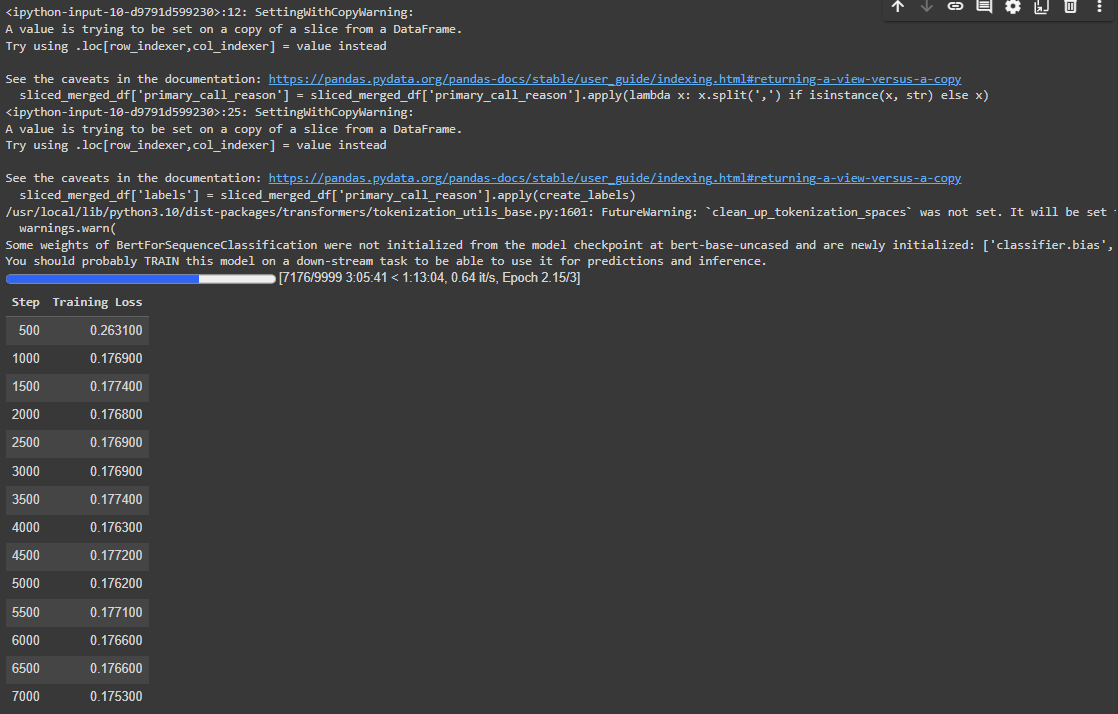

#Predicting test predictions using approach 4

In [ ]:
# Load the test DataFrame
test_df = pd.read_csv('/content/drive/MyDrive/United Airlines/testbc7185d.csv')

# Extract call IDs from the test file
test_call_ids = test_df['call_id'].tolist()

# Filter the merged DataFrame to get transcripts for the test call IDs
test_dataset = merged_df[merged_df['call_id'].isin(test_call_ids)]['call_transcript']

In [ ]:
# Evaluate the model
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)
test_df['predicted_reason']= y_pred
test_df.to_csv('/content/drive/MyDrive/United Airlines/test_predictions.csv', index=False)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
